# Improved CNN-LSTM

# Import Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [3]:
data = pd.read_csv('./meta.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


# Data Cleaning

In [4]:
# Reset index
data.reset_index(drop=True, inplace=True)

# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Fill NaN values in numeric columns with the mean of those columns
data[numeric_data.columns] = data[numeric_data.columns].fillna(numeric_data.mean())

# Display the first few rows of the DataFrame
print(data.head())

         Date   Open   High    Low    Close     Volume
0  2012-05-18  42.05  45.00  38.00  38.2318  573576400
1  2012-05-21  36.53  36.66  33.00  34.0300  168192700
2  2012-05-22  32.61  33.59  30.94  31.0000  101786600
3  2012-05-23  31.37  32.50  31.36  32.0000   73600000
4  2012-05-24  32.95  33.21  31.77  33.0300   50237200


In [5]:
# Calculate moving average
ma_day = [5, 10, 20, 50]  # Common short-term and long-term windows
for ma in ma_day:
    column_name = f"MA for {ma} days"
    data[column_name] = data['Close'].rolling(window=ma).mean()

# Calculate Exponential moving average
for ma in ma_day:
    column_name = f"EMA for {ma} days"
    data[column_name] = data['Close'].ewm(span=ma, adjust=False).mean()

# Volatility (Standard Deviation): Capture price fluctuations:
# for ma in ma_day:
#     column_name = f"Volatility_{ma}d"
#     data[column_name] = data['Close'].rolling(window=ma).std()

# Calculate RSI
def compute_RSI(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    return 100 - (100 / (1 + RS))

data['RSI_14'] = compute_RSI(data)

# # Trading Volume Moving Average: Add moving averages for the Volume
# for ma in ma_day:
#     data[f"Volume_MA_{ma}"] = data['Volume'].rolling(window=ma).mean()



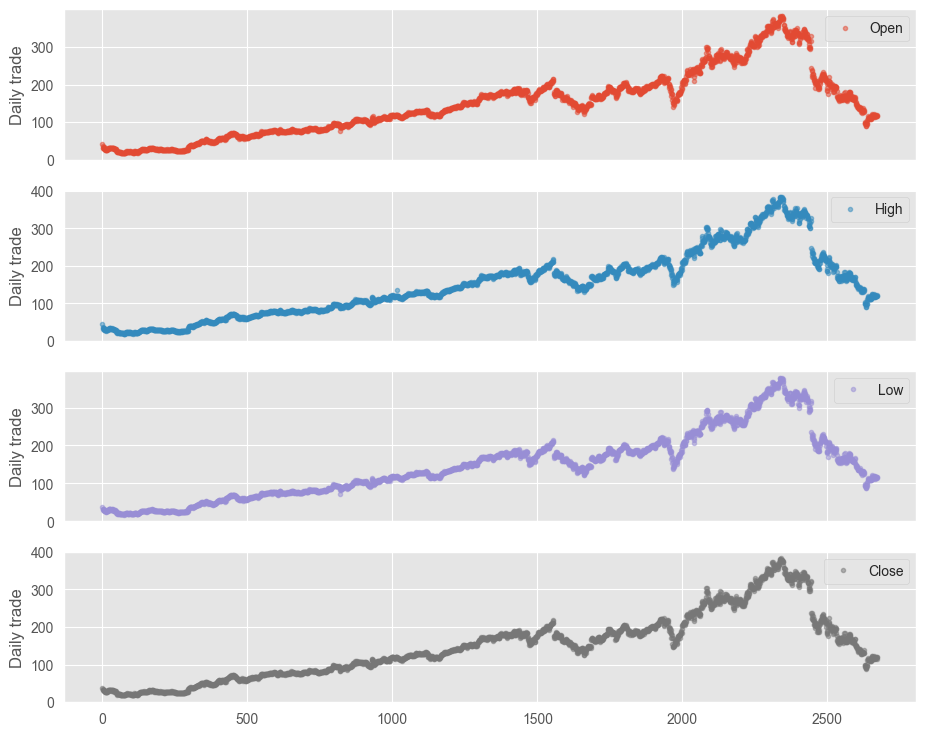

In [6]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date    Open     High       Low     Close     Volume  \
0     2012-05-18   42.05   45.000   38.0000   38.2318  573576400   
1     2012-05-21   36.53   36.660   33.0000   34.0300  168192700   
2     2012-05-22   32.61   33.590   30.9400   31.0000  101786600   
3     2012-05-23   31.37   32.500   31.3600   32.0000   73600000   
4     2012-05-24   32.95   33.210   31.7700   33.0300   50237200   
...          ...     ...      ...       ...       ...        ...   
2668  2022-12-23  116.03  118.175  115.5350  118.0400   17796625   
2669  2022-12-27  117.93  118.600  116.0501  116.8800   21392311   
2670  2022-12-28  116.25  118.150  115.5100  115.6200   19612473   
2671  2022-12-29  116.40  121.030  115.7700  120.2600   22366192   
2672  2022-12-30  118.16  120.420  117.7400  120.3400   19583825   

      MA for 5 days  MA for 10 days  MA for 20 days  MA for 50 days  \
0               NaN             NaN             NaN             NaN   
1               NaN             NaN      

,count,mean,std,min,25%,50%,75%,max
Open,2673.0,1.479633e+02,8.696828e+01,1.808000e+01,7.780000e+01,1.422600e+02,1.913600e+02,3.816800e+02
High,2673.0,1.498468e+02,8.805465e+01,1.827000e+01,7.853000e+01,1.445600e+02,1.940300e+02,3.843300e+02
Low,2673.0,1.460862e+02,8.591529e+01,1.755000e+01,7.705000e+01,1.408700e+02,1.884700e+02,3.788100e+02
Close,2673.0,1.479917e+02,8.699929e+01,1.772900e+01,7.783000e+01,1.422800e+02,1.912900e+02,3.821800e+02
Volume,2673.0,3.115405e+07,2.721709e+07,5.913066e+06,1.618928e+07,2.313342e+07,3.599420e+07,5.735764e+08
MA for 5 days,2669.0,1.480981e+02,8.692966e+01,1.846140e+01,7.780600e+01,1.422620e+02,1.913780e+02,3.790300e+02
MA for 10 days,2664.0,1.482359e+02,8.686269e+01,1.877955e+01,7.777912e+01,1.418685e+02,1.917312e+02,3.786580e+02
MA for 20 days,2654.0,1.485193e+02,8.673551e+01,1.925918e+01,7.751544e+01,1.434165e+02,1.920813e+02,3.734220e+02
MA for 50 days,2624.0,1.493997e+02,8.630554e+01,2.017572e+01,7.745560e+01,1.471485e+02,1.906790e+02,3.637544e+02
EMA for 5 days,2673.0,1.479314e+02,8.694024e+01,1.846579e+01,7.757111e+01,1.420655e+02,1.913073e+02,3.782458e+02


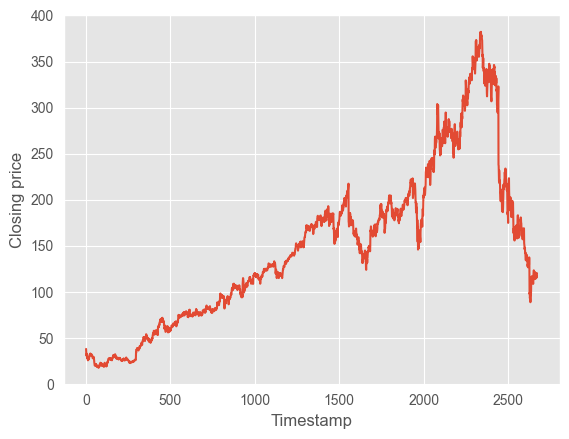

In [7]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [8]:
data.dropna(inplace=True)
data.head(500)

,Date,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14
49,2012-07-30,23.995,24.04,23.030,23.15,29285900,26.29800,27.52000,29.237800,29.838636,25.546291,27.046144,28.449746,30.538853,15.733114
50,2012-07-31,23.370,23.37,21.610,21.71,56179400,24.95000,26.88200,28.784750,29.508200,24.267527,26.075936,27.807865,30.192623,14.602446
51,2012-08-01,21.500,21.58,20.840,20.88,44604400,23.25800,26.05900,28.268750,29.245200,23.138351,25.131220,27.148068,29.827422,13.890909
52,2012-08-02,20.770,20.84,19.820,20.04,56374500,21.89700,25.16300,27.697250,29.026000,22.105568,24.205544,26.471110,29.443602,13.172414
53,2012-08-03,20.360,22.16,19.900,21.09,80647000,21.37400,24.39600,27.165250,28.807800,21.767045,23.639081,25.958623,29.116010,22.638623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2014-07-21,68.810,69.96,68.500,69.40,49431600,67.81096,66.58973,66.626865,64.001716,68.007206,67.283914,66.478537,64.769416,56.251778
545,2014-07-22,69.760,69.77,68.610,69.27,40301800,68.23196,67.24073,66.821865,64.242316,68.428138,67.645020,66.744391,64.945909,53.726471
546,2014-07-23,69.740,71.33,69.610,71.29,77435900,68.95796,67.87273,67.100365,64.471516,69.382092,68.307744,67.177306,65.194697,64.538726
547,2014-07-24,75.960,76.74,74.510,74.98,124006900,70.67198,68.88348,67.477365,64.774516,71.248061,69.520881,67.920420,65.578435,71.536342


In [14]:
# kfold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

# Data preparation (your existing code)
X = []
Y = []
window_size = 100

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, 4]
    temp = []
    temp2 = []
    for j in range(window_size):
        normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
        rsi_14 = df.iloc[i + j, -1]
        temp.append([normalized_close, rsi_14])
    temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)
    X.append(np.array(temp))
    Y.append(np.array(temp2).reshape(1, 1))

# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Reshape the data for CNN models
X = X.reshape(X.shape[0], 1, 100, 2)

In [10]:
# function creation for kfold
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

def create_model():
    model = tf.keras.Sequential()
    
    # CNN layers
    model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', 
                                   kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                                   input_shape=(None, 100, 1))))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
    model.add(TimeDistributed(MaxPooling1D(2)))

    model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same',
                                   kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
    model.add(TimeDistributed(MaxPooling1D(2)))

    model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same',
                                   kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
    model.add(TimeDistributed(BatchNormalization()))
    model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
    model.add(TimeDistributed(MaxPooling1D(2)))

    model.add(TimeDistributed(Flatten()))

    # LSTM layers
    model.add(Bidirectional(LSTM(128, return_sequences=True, 
                                kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                                recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Bidirectional(LSTM(64, return_sequences=False,
                                kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                                recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    # Dense layers
    model.add(Dense(32, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))

    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='huber', metrics=['mse', 'mae'])
    
    return model

# Define callbacks
def get_callbacks():
    return [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.2,
            patience=5,
            min_lr=1e-6
        )
    ]


In [33]:
# updated Code
# I USED THIS CODE
from sklearn.model_selection import train_test_split
import numpy as np

X = []
Y = []
window_size = 100

# Iterating through the dataset to create inputs and targets
for i in range(1, len(df) - window_size - 1, 1):
    first_close = df.iloc[i, 4]  # Normalize using "Close" price
    temp = []
    temp2 = []
    for j in range(window_size):
        # Normalize "Close" and include RSI_14 as a second feature
        normalized_close = (df.iloc[i + j, 4] - first_close) / first_close
        rsi_14 = df.iloc[i + j, -1]  # Assuming RSI_14 is the last column
        temp.append([normalized_close, rsi_14])  # Add both features as a pair
    temp2.append((df.iloc[i + window_size, 4] - first_close) / first_close)  # Use "Close" for target
    X.append(np.array(temp))  # Each sample has shape (100, 2)
    Y.append(np.array(temp2).reshape(1, 1))

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

# Converting lists to numpy arrays
train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

# Reshaping the data for CNN models
train_X = train_X.reshape(train_X.shape[0], 1, 100, 2)  # Adding 2 for two features
test_X = test_X.reshape(test_X.shape[0], 1, 100, 2)

# Printing the number of training and testing samples
print(len(train_X))
print(len(test_X))


2017
505


In [9]:
df.describe()

,Open,High,Low,Close,Volume,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days,EMA for 5 days,EMA for 10 days,EMA for 20 days,EMA for 50 days,RSI_14
count,2624.000000,2624.000000,2624.000000,2624.000000,2.624000e+03,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000,2624.000000
mean,150.161578,152.068111,148.265799,150.195498,3.083865e+07,150.124783,150.039778,149.872516,149.399662,150.125349,150.040744,149.876060,149.367650,53.527121
std,86.260685,87.344310,85.205282,86.285013,2.492761e+07,86.270747,86.274878,86.296090,86.305543,86.238161,86.211320,86.153216,85.928699,15.701355
min,18.080000,18.270000,17.550000,17.729000,5.913066e+06,18.461400,18.779550,19.259175,20.175722,18.465794,18.908580,19.687109,21.066464,9.768073
25%,79.500000,80.370000,78.630075,79.590000,1.619210e+07,79.430250,79.214625,78.588000,77.455600,79.355070,79.155195,78.611948,77.741748,42.439896
50%,146.115000,148.380000,143.615000,146.025000,2.311563e+07,147.003000,147.223500,146.617250,147.148500,146.764187,146.273258,146.933017,147.576913,54.083769
75%,192.641250,195.292500,189.710000,192.425000,3.577521e+07,192.241500,192.435250,193.016000,190.679000,192.114505,192.176323,191.969407,189.814627,65.162502
max,381.680000,384.330000,378.810000,382.180000,3.654579e+08,379.030000,378.658000,373.422000,363.754400,378.245783,376.395447,372.864406,362.957059,94.981061


In [10]:
# Check if there are any NaN values

print(np.isnan(train_X).any(), np.isnan(train_Y).any())
print(np.isinf(train_X).any(), np.isinf(train_Y).any())

False False
False False


In [34]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Create the model
model = tf.keras.Sequential()

# Enhanced CNN layers with BatchNormalization and LeakyReLU
model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same', 
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                               input_shape=(None, 100, 1))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(128, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Conv1D(64, kernel_size=3, padding='same',
                               kernel_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(LeakyReLU(alpha=0.1)))
model.add(TimeDistributed(MaxPooling1D(2)))

model.add(TimeDistributed(Flatten()))

# Enhanced LSTM layers (removed clip_norm parameter)
model.add(Bidirectional(LSTM(128, return_sequences=True, 
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Bidirectional(LSTM(64, return_sequences=False,
                            kernel_regularizer=L1L2(l1=1e-5, l2=1e-4),
                            recurrent_regularizer=L1L2(l1=1e-5, l2=1e-4))))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Dense layers with regularization
model.add(Dense(32, kernel_regularizer=L1L2(l1=1e-5, l2=1e-4)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

# Optimizer with gradient clipping (clipnorm moved here)
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer,
             loss='huber', # use mse
             metrics=['mse', 'mae'])

# Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model.fit(
    train_X, 
    train_Y,
    validation_data=(test_X, test_Y),
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)

Epoch 1/100


c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 0.9942 - mae: 0.7667 - mse: 0.9753 - val_loss: 0.5004 - val_mae: 0.2117 - val_mse: 0.0804 - learning_rate: 0.0010
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.6026 - mae: 0.4411 - mse: 0.3124 - val_loss: 0.4863 - val_mae: 0.2768 - val_mse: 0.1032 - learning_rate: 0.0010
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.5250 - mae: 0.3424 - mse: 0.1882 - val_loss: 0.4566 - val_mae: 0.2199 - val_mse: 0.0708 - learning_rate: 0.0010
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4894 - mae: 0.2942 - mse: 0.1443 - val_loss: 0.4308 - val_mae: 0.1871 - val_mse: 0.0483 - learning_rate: 0.0010
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4596 - mae: 0.2624 - mse: 0.1140 - val_loss: 0.4048 - val_mae: 0.1315 - val_mse: 0.0284 - learning_rate: 0.0010
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.4283 - mae: 0.2192 - mse: 0.0838 - val_loss: 0.3846 - val_mae: 0.1119 - val_mse

In [12]:
# # original model training
# # For creating model and training
# import tensorflow as tf
# from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
# from tensorflow.keras.layers import MaxPooling1D, Flatten
# from tensorflow.keras.regularizers import L1, L2
# from tensorflow.keras.metrics import Accuracy
# from tensorflow.keras.metrics import RootMeanSquaredError

# model = tf.keras.Sequential()

# # Creating the Neural Network model here...
# # CNN layers
# model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
# model.add(TimeDistributed(MaxPooling1D(2)))
# model.add(TimeDistributed(Flatten()))
# # model.add(Dense(5, kernel_regularizer=L2(0.01)))

# # LSTM layers
# model.add(Bidirectional(LSTM(100, return_sequences=True)))
# model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(100, return_sequences=False)))
# model.add(Dropout(0.5))

# #Final layers
# model.add(Dense(1, activation='linear'))
# model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

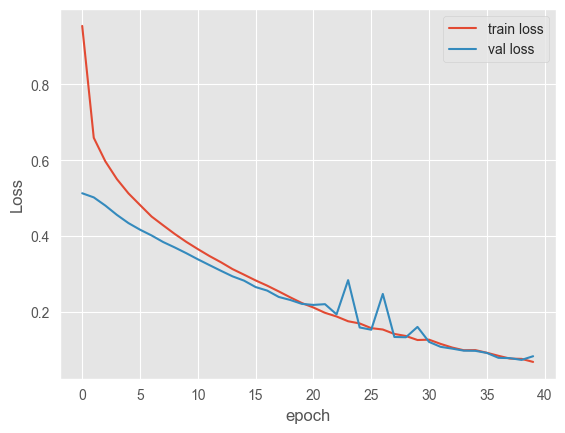

In [48]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

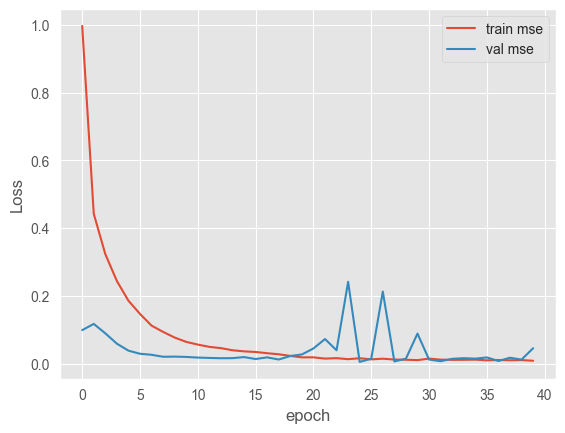

In [49]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

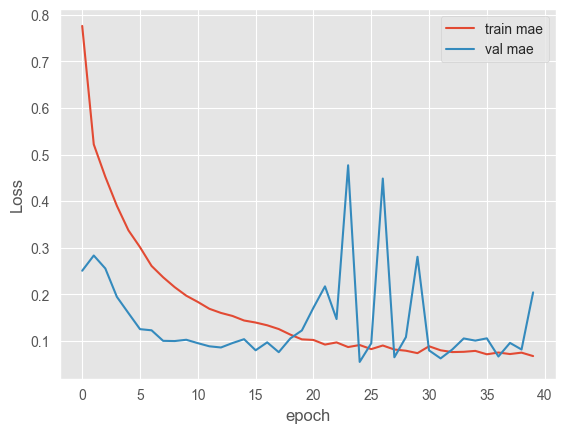

In [50]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [51]:
model.evaluate(test_X, test_Y)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 306.8664 - mae: 307.2999 - mse: 100688.2266


[297.8353576660156, 97461.328125, 298.26885986328125]

In [39]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.985748
R2 Score: 0.985748
Max Error: 0.168027


In [40]:
# make predictions
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


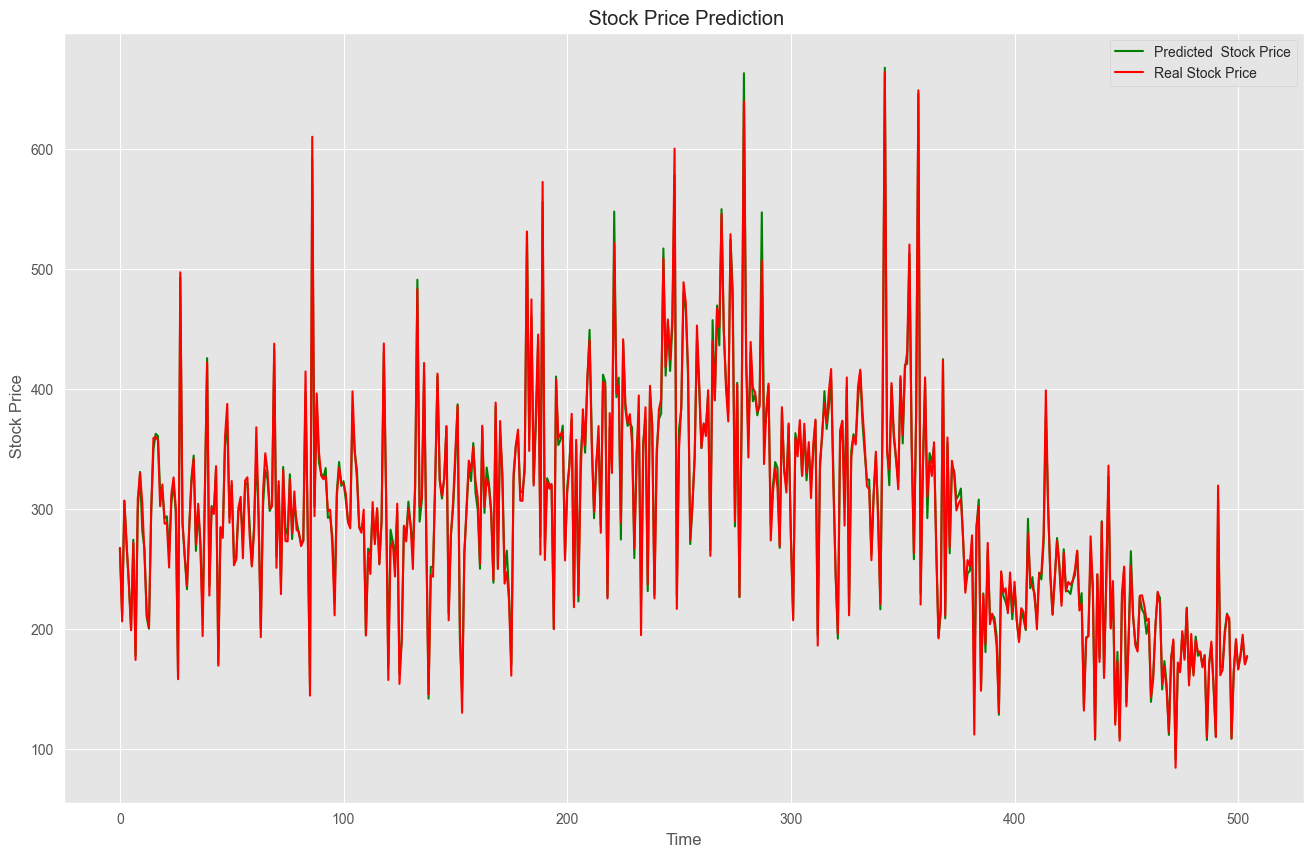

In [52]:

plt.figure(figsize=(16, 10))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [42]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Calculate performance metrics
mse = mean_squared_error(test_label, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_label, predicted)
mape = np.mean(np.abs((test_label - predicted) / test_label)) * 100

# Print performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 60.04613343409432
Root Mean Squared Error (RMSE): 7.748944020580761
Mean Absolute Error (MAE): 5.693411671827367
Mean Absolute Percentage Error (MAPE): 2.00%
